In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes
import numpy as np
import pickle
from mayavi import mlab


from pulsars import Pulsars, c, e_charge, e_mass, h
import speiser_fun_cyl as sfc


In [2]:
#Ανάγνωση του λεξικού παραμέτρων
dir_path = 'data11'
with open('{}/par_dic.txt'.format(dir_path), 'rb') as par_dic:
    pdic = pickle.loads(par_dic.read())

In [3]:
#Έκχώρηση των παραμέτρων της προσωμοίωσης
k = pdic['multiplicity']
name = pdic['pulsar_name']
pulsar = Pulsars(k)[name]

gamma1 = 1.
B_0 = pdic['char magn field (Blc)']
omegaB = (e_charge*B_0/(e_mass*c))    #γυροσυχνότητα
Rlc = pdic['Radius of lc']
Delta = pdic['diss zone length']

gamma0 = pdic['initial lorentz factors']
init_pos = pdic['initial injection positions']

delta = pdic['diss zone width']    #πάχος του φύλλου ρεύματος, αδιάστατο, σε μονάδες [c/ωΒ]

T = pdic['runtime']
N = pdic['number of t points']
t = np.linspace(0.0, T*Delta, N)

pop = gamma0**(-1.)

In [4]:
%matplotlib notebook

In [5]:
#Τροχιά ενός ηλεκτρονίου
q = -1
charge = 'el'

In [6]:
for w in range(len(init_pos)):

    vec = np.load('{}/cyl_{}_{}.npz'.format(dir_path, int(100*init_pos[w]), charge))
    r, ur, phi, uphi, z_cyl, uz_cyl = vec['r'], vec['ur'], vec['phi'], vec['uphi'], vec['z_cyl'], vec['uz_cyl']
    
#     vec2 = np.load('{}/rc_nc_pr_{}_{}.npz'.format(dir_path, int(100*init_pos[w]), charge))
#     r_curv, nu_crit, p_rad = vec2['r_curv'], vec2['nu_crit'], vec2['p_rad']

<IPython.core.display.Javascript object>


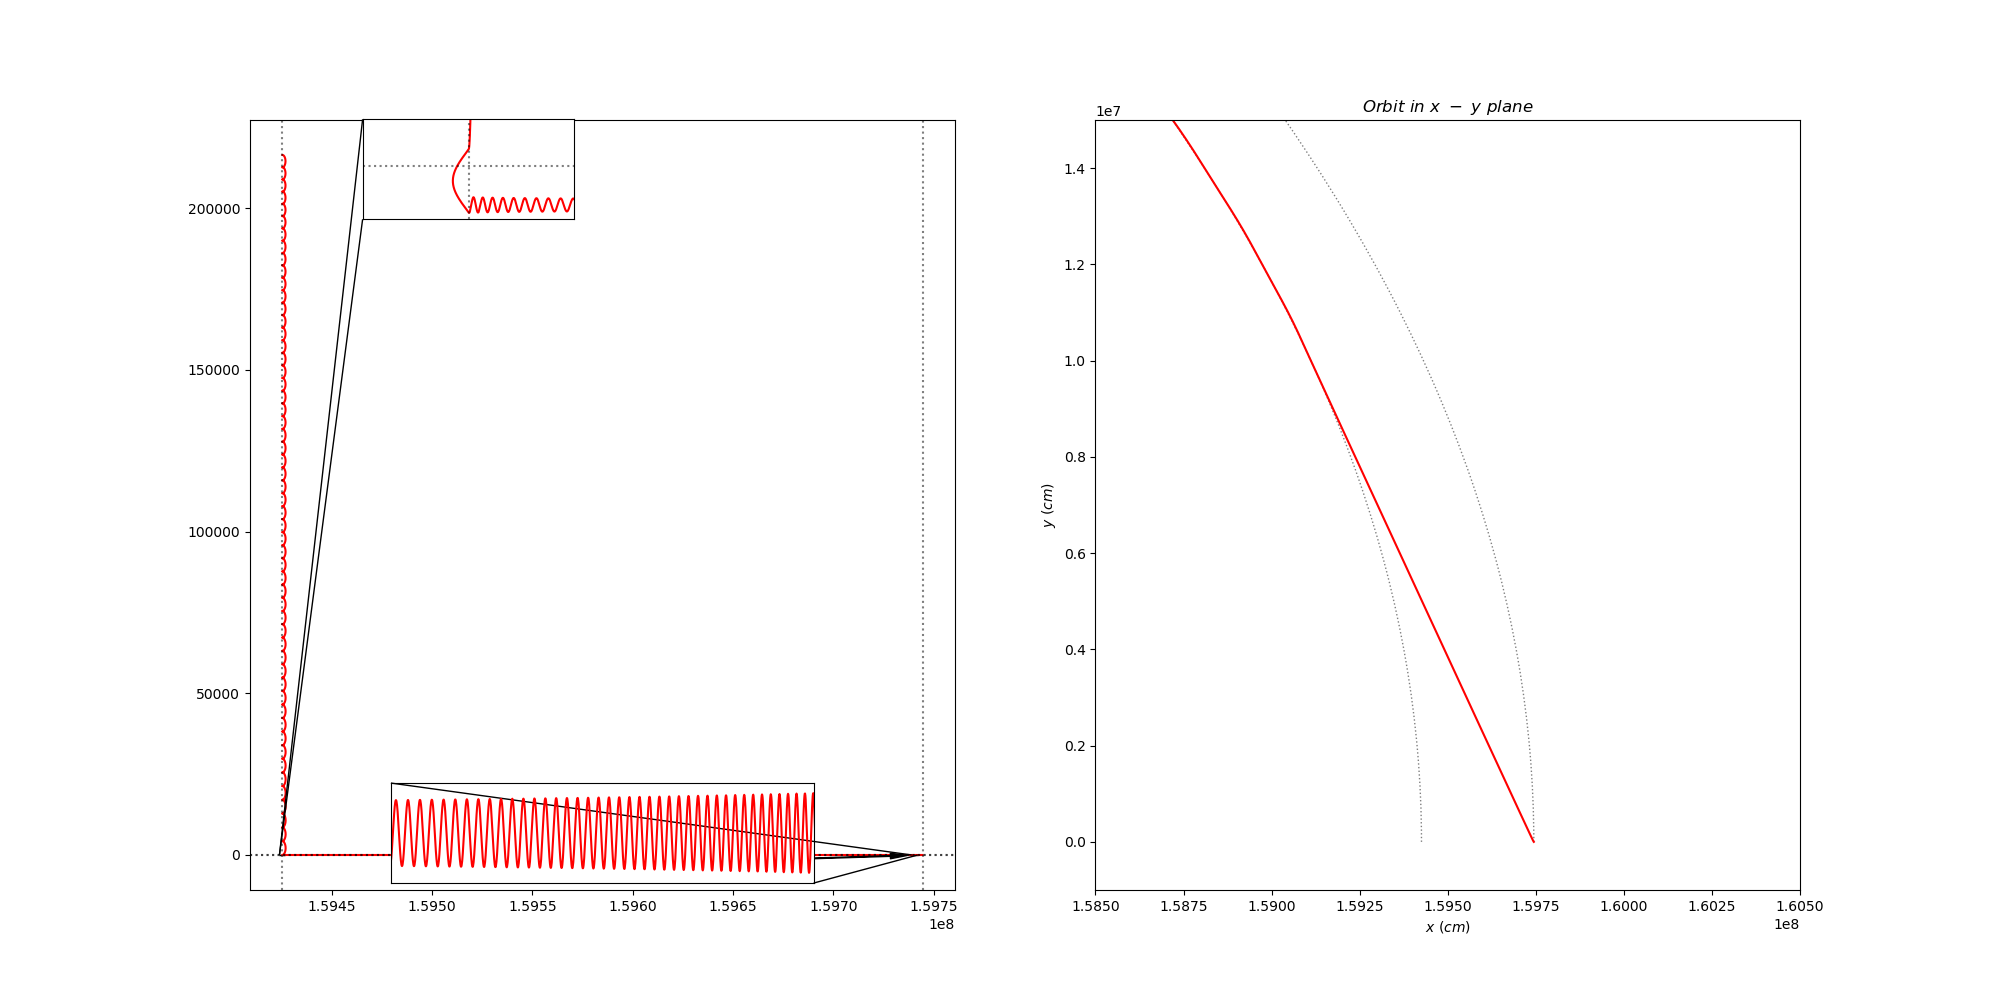

In [10]:
fig2, (ax2, ax1) = plt.subplots(1,2, figsize=(20, 10))


#########Τροχιά στο r-z επίπεδο############
ax2.plot(r[0]*c/omegaB, z_cyl[0]*c/omegaB, color = 'r')
# ax2.set(xlabel='r (cm)', ylabel='z (cm)', ylim = [-2.5*delta*c/omegaB, 2.5*delta*c/omegaB], 
#         title = '$Orbit \ in \ r \ - \ z \ plane$')

#τα όρια της περιοχής επιτάχυσνης
ax2.axhline(y = delta*c/omegaB, linestyle = ':', color = 'k', alpha = 0.5)
ax2.axhline(y = -delta*c/omegaB, linestyle = ':', color = 'k', alpha = 0.5)
ax2.axvline(x = Rlc*c/omegaB, linestyle = ':', color = 'k', alpha = 0.5)
ax2.axvline(x = (Rlc + Delta)*c/omegaB, linestyle = ':', color = 'k', alpha = 0.5)

#σημείο εισόδου
ax2.annotate('$ Injection \ Point$ \n $\Gamma_{{inj}} = 500$ ', xy = ((Rlc + Delta)*c/omegaB, delta*c/omegaB), 
             xytext = ((Rlc + 0.6*Delta)*c/omegaB, 1.2*delta*c/omegaB),
             arrowprops=dict( facecolor="black", width=0.5, headwidth=4, shrink=0.1))

#μεγέθυνση τμήματος της τροχιάς speiser
axins = inset_axes(ax2, width="60%", 
                        height=1., 
                        loc='lower center', )
axins.plot(r[0]*c/omegaB, z_cyl[0]*c/omegaB, color = 'r')
x1, x2, y1, y2 = 9000+1.5973*10**8, 12000+1.5973*10**8, -0.2, 0.2
axins.set(xlim = [x1, x2], ylim = [y1, y2], xticklabels = [], yticklabels = [], xticks = [], yticks = [])
mark_inset(ax2, axins, loc1=4, loc2=2, fc="k", ec="k")

#μεγένθυση τμήματος της τροχιάς στην CLR
axins2 = inset_axes(ax2, width="30%", 
                        height=1., 
                        loc='upper left', bbox_transform = ax2.transAxes, bbox_to_anchor = (0.15,0.01,1,1))
axins2.plot(r[0]*c/omegaB, z_cyl[0]*c/omegaB, color = 'r')

x3, x4, y3, y4 = 4000+1.5942*10**8, 7000+1.5942*10**8, -0.2, 1.2
axins2.set(xlim = [x3, x4], ylim = [y3, y4], xticklabels = [], yticklabels = [], xticks = [], yticks = [])
axins2.axhline(y = delta*c/omegaB, linestyle = ':', color = 'k', alpha = 0.5)
axins2.axhline(y = -delta*c/omegaB, linestyle = ':', color = 'k', alpha = 0.5)
axins2.axvline(x = Rlc*c/omegaB, linestyle = ':', color = 'k', alpha = 0.5)
mark_inset(ax2, axins2, loc1=2, loc2=3, fc="k", ec="k")

#Διαστάσεις της dissipation zone
# ax2.annotate("δ",
#             xy=((Rlc + 1.02*Delta)*c/omegaB, -delta*c/omegaB),
#             xytext=((Rlc + 1.02*Delta)*c/omegaB, 0),
#             arrowprops=dict(arrowstyle="->", connectionstyle = 'arc3', color = 'g', relpos = (0.5, 0.5)))


#########Τροχιά στο χ-ψ επίπεδο############
ax1.plot(r[0]*np.cos(phi[0])*c/omegaB, r[0]*np.sin(phi[0])*c/omegaB, 'r')
ax1.set(xlabel = '$x \ (cm)$', ylabel = '$y\ (cm)$', title = '$Orbit \ in \ x \ - \ y \ plane$', aspect = 'auto', 
        xlim = [1.585E+8, 1.605E+8], ylim = [-0.1E+7, 1.5E+7], )

radius1 = mpatches.Arc((0.0, 0.0), 2*Rlc*c/omegaB, 2*Rlc*c/omegaB, theta1 = 0, theta2 = 90, color = 'k', ls = ':',
                       linewidth=1, fill=False, alpha = 0.5)
radius2 = mpatches.Arc((0.0, 0.0), 2*(Rlc + Delta)*c/omegaB, 2*(Rlc + Delta)*c/omegaB, theta1 = 0, theta2 = 90,
                       color = 'k', ls = ':', linewidth=1, fill=False, alpha = 0.5)
ax1.add_patch(radius1)
ax1.add_patch(radius2)

plt.savefig('electron_orbit.png')


In [8]:
fig1, (ax3,ax4) = plt.subplots(1,2, figsize = (10,5))

ax3.plot(t/omegaB, sfc.gamma(ur[0], uphi[0], uz_cyl[0]), 
                         color = 'r')

ax3.set(xlabel = 'r (cm)', ylabel = '$\Gamma$', title = 'Evolution of Lorentz factor', ylim = [0, 5*10**8], 
        xlim = [0, T*Delta/omegaB])
#         xlim = [(Rlc - 0.5*Delta)*c/omegaB, (Rlc + 1.5*Delta)*c/omegaB])
# ax3.axvline(x = Rlc*c/omegaB, linestyle = ':', color = 'k', alpha = 0.5)
# ax3.axvline(x = (Rlc + Delta)*c/omegaB, linestyle = ':', color = 'k', alpha = 0.5)


# ax4.plot(t, r_curv[0]*c/omegaB, c = 'r')
ax4.set(xlabel = 'r (cm)', ylabel = '$R_{curv} \ (cm)$', title = 'Evolution of Radius of Curvature', )

plt.savefig('electron_gamma_and_rcurv.png')

<IPython.core.display.Javascript object>

In [9]:
fig1, (ax3,ax4) = plt.subplots(1,2, figsize = (10,5))

ax3.plot(t/Delta, sfc.gamma(ur[0], uphi[0], uz_cyl[0]), 
                         color = 'r')

ax3.set(xlabel = '$t/(\Delta/c)$', ylabel = '$\Gamma$', title = 'Lorentz factor', )
# ax3.axvline(x = Rlc*c/omegaB, linestyle = ':', color = 'k', alpha = 0.5)
# ax3.axvline(x = (Rlc + Delta)*c/omegaB, linestyle = ':', color = 'k', alpha = 0.5)


ax4.plot(t/Delta, r_curv[0]/Rlc, c = 'r')
ax4.set(xlabel = '$t/(\Delta/c)$', ylabel = '$R_{c}/R_{lc}$', 
        title = 'Instantanious radius of curvature', )

# plt.savefig('electron_gamma_and_rcurv.png')

<IPython.core.display.Javascript object>

NameError: name 'r_curv' is not defined